In [2]:
import torch
from torchvision import models, transforms
import torch.nn as nn
from PIL import Image

batch_size = 4
img_size = 84
num_classes = 8
data_dir = 'data'
sgd_lr = 0.001
sgd_momentum = 0.9
num_epochs = 100

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

        # Calculate the size of the tensor after the last pooling layer
        self.fc_size = 256 * (img_size // 16) * (img_size // 16)

        self.fc1 = nn.Linear(self.fc_size, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))

        x = x.view(-1, self.fc_size)

        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()
model.load_state_dict(torch.load('model_100.pth'))
model.eval()


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=6400, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=8, bias=True)
)

data\Test\NV\ISIC_0028787.jpg


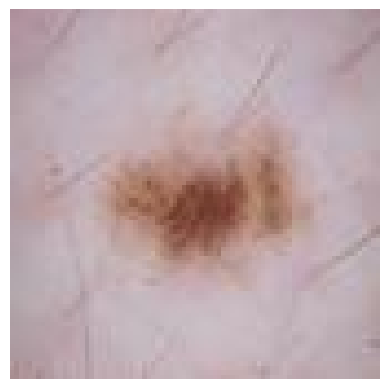

In [12]:
# Load the image
#randomly select an image from the test set
import os
import random
import numpy as np
from PIL import Image
from torchvision import transforms

data_dir = 'data'
# Load the image
# Select a random directory from the 'Test' directory
random_dir = random.choice(os.listdir(os.path.join(data_dir, 'Test')))

# Select a random file from the randomly selected directory
random_file = random.choice(os.listdir(os.path.join(data_dir, 'Test', random_dir)))

# Construct the path to the random file
img_path = os.path.join(data_dir, 'Test', random_dir, random_file)
print(img_path)
img = Image.open(img_path)
preprocess = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_tensor = preprocess(img)
img_tensor = img_tensor.unsqueeze(0)

#display the image
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


NV


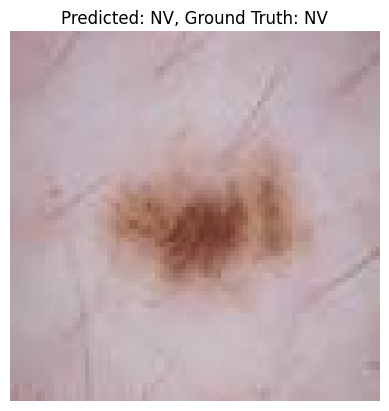

In [13]:
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)
    #display the image with the predicted label and the ground truth label
    # Assuming class_names is a list of class names in the order they were used for training
    class_names = ['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']
    
    # Get the predicted class index
    predicted_index = predicted.item()
    
    # Get the class name
    predicted_class_name = class_names[predicted_index]
    
    print(predicted_class_name)
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {class_names[predicted_index]}, Ground Truth: {random_dir}')
    plt.show()
    